### Extracting the patches, embedding data and running through a toy ansatz

In [1]:
import torch
import torchvision.transforms as transforms
from medmnist import INFO
import medmnist
import math

In [2]:
data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

train_dataset = DataClass(split='train', transform=data_transform, download=download, size=224, mmap_mode='r')

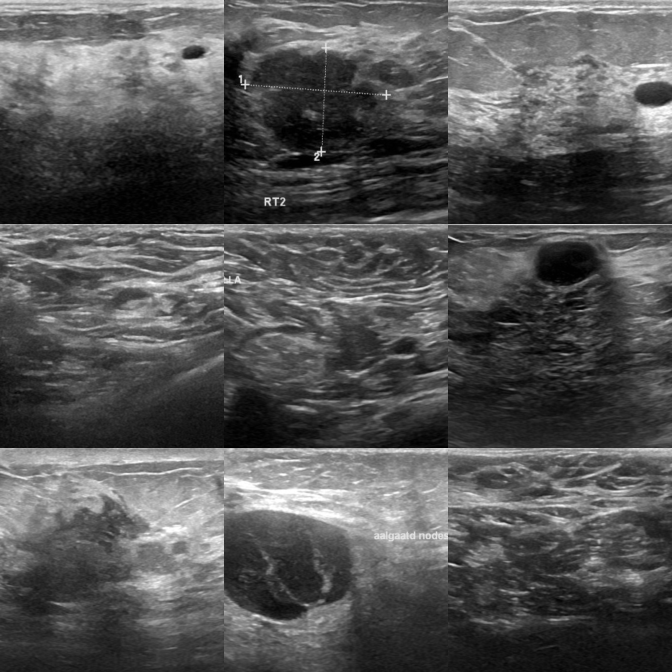

In [3]:
train_dataset.montage(length=3)

In [4]:
image = train_dataset.imgs[0]
no_patches = 1
patch_size = 2
enconding = []
for row in range(patch_size):
    for column in range(patch_size):
        enconding.append(math.pi * image[row][column]/255)


In [9]:
enconding_tensor = torch.tensor(enconding)
enconding_tensor

tensor([1.9835, 1.9835, 1.9096, 1.8603], dtype=torch.float64)

In [ ]:
from ansatz_simulation_class import AnsatzSimulation

my_ansatz = AnsatzSimulation(n_qubits=4)
state_vector = my_ansatz.angleEmbedding(enconding_tensor, 'rx')
state_vector = torch.reshape(state_vector, shape=(2,2,2,2))
layer = ['pauli_x', 'trgt', 'ctrl', 'ry_gate']
my_ansatz.simulate_circuit(state_vector, layer)

IndexError: Dimension out of range (expected to be in range of [-4, 3], but got 5)

In [ ]:
cnot_gate = torch.tensor([[[[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j]],

         [[0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j]]],


        [[[0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],

         [[0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j]]]], dtype=torch.complex64)
torch.tensordot(cnot_gate, state_vector, dims=([2,3], [2,0]))

tensor([[[[ 0.1034+0.0000j,  0.0000-0.1387j],
          [ 0.0000-0.1582j, -0.2122+0.0000j]],

         [[ 0.0000-0.1582j, -0.2122+0.0000j],
          [-0.2419+0.0000j,  0.0000+0.3245j]]],


        [[[-0.2234+0.0000j,  0.0000+0.2997j],
          [ 0.0000+0.3418j,  0.4584+0.0000j]],

         [[ 0.0000-0.1461j, -0.1959+0.0000j],
          [-0.2234+0.0000j,  0.0000+0.2997j]]]])

In [ ]:
layer = ['pauli_x', 'trgt', 'ctrl', 'ry_gate']
my_ansatz.simulate_circuit(state_vector, layer)

IndexError: Dimension out of range (expected to be in range of [-4, 3], but got 5)